In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = './dataset'

labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107

FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.1,shuffle=True)

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs = 500, validation_split = 0.2)

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd) 

In [ ]:
from datetime import timedelta
import cv2
import numpy as np
import os

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
SAVING_FRAMES_PER_SECOND = 16

In [ ]:
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return (result + ".00").replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")


def get_saving_frames_durations(cap, saving_fps):
    """A function that returns the list of durations where to save the frames"""
    s = []
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # use np.arange() to make floating-point steps
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

In [ ]:
import matplotlib.pyplot as plt
arr = []
def main(video_file):
    filename, _ = os.path.splitext(video_file)
    filename += "-opencv"
    # make a folder by the name of the video file
    if not os.path.isdir(filename):
        os.mkdir(filename)
    # read the video file    
    cap = cv2.VideoCapture(video_file)
    # get the FPS of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
    saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
    # get the list of duration spots to save
    saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
    # start the loop
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            # break out of the loop if there are no frames to read
            break
        # get the duration by dividing the frame count by the FPS
        frame_duration = count / fps
        try:
            # get the earliest duration to save
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # the list is empty, all duration frames were saved
            break
        if frame_duration >= closest_duration:
            # if closest duration is less than or equals the frame duration, 
            # then save the frame
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            # plt.imshow(frame)
            # print(frame.shape)
            arr.append(cv2.resize(frame,(112,112)))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # drop the duration spot from the list, since this duration spot is already saved
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # increment the frame count
        count += 1

In [ ]:
main('1.mp4')

In [ ]:
arr = arr[:16]

In [ ]:
len(arr)

In [ ]:
import numpy as np
train_images = np.asarray([arr])
train_labels = np.asarray([0]).astype('int64')
# train_labels[0]=1

In [ ]:
train_images.shape

In [ ]:
model_history = model.fit(train_images,train_labels,epochs = 20)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/MyDrive')

Mounted at /MyDrive


In [ ]:
!ls '../Dataset'

ls: cannot access '../Dataset': No such file or directory


In [ ]:
import os
labels=[]

data_path = '../MyDrive/MyDrive/Dataset'

# for folder in os.listdir(data_path):
#   print(folder)
#   labels.append(folder)
# labels.sort() #len = 107

for folder in os.walk(data_path):
  print(folder)
  labels.append(folder)
labels.sort() #len = 107

('../MyDrive/MyDrive/Dataset', ['Trikonasana', 'Sarvangasana', 'Vrikshasana', 'Setubandhasana', 'Virbhadrasana2', 'Shavasana', 'Vakrasana', 'Tadasana', 'Sashankasana', 'Virbhadrasana1', 'Adhomukhasvanasana', 'Padmasana', 'Phalakasana', 'Ardhachakrasana', 'Dhanurasana', 'Bhujangasana', 'Pawanmuktasana', 'Marjariasana', 'Padahastasana'], [])
('../MyDrive/MyDrive/Dataset/Trikonasana', [], ['10.mp4', '32.mp4', '12.mp4', '14.mp4', '30.mp4', '13.mp4', '25.mp4', '17.mp4', '11.mp4', '1.mp4', '23.mp4', '16.mp4', '33.mp4', '9.mp4', '3.mp4', '8.mp4', '22.mp4', '26.mp4', '36.mp4', '2.mp4', '31.mp4', '44.mp4', '19.mp4', '40.mp4', '49.mp4', '35.mp4', '51.mp4', '6.mp4', '50.mp4', '20.mp4', '5.mp4', '21.mp4', '45.mp4', '37.mp4', '53.mp4', '24.mp4', '48.mp4', '43.mp4', '27.mp4', '41.mp4', '4.mp4', '47.mp4', '52.mp4', '34.mp4', '18.mp4', '39.mp4', '15.mp4', '29.mp4', '54.mp4', '46.mp4', '42.mp4', '28.mp4', '7.mp4', '38.mp4'])
('../MyDrive/MyDrive/Dataset/Sarvangasana', [], ['41.mp4', '36.mp4', '34.mp4',

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107

In [ ]:
labels

['Adhomukhasvanasana',
 'Ardhachakrasana',
 'Bhujangasana',
 'Dhanurasana',
 'Marjariasana',
 'Padahastasana',
 'Padmasana',
 'Pawanmuktasana',
 'Phalakasana',
 'Sarvangasana',
 'Sashankasana',
 'Setubandhasana',
 'Shavasana',
 'Tadasana',
 'Trikonasana',
 'Vakrasana',
 'Virbhadrasana1',
 'Virbhadrasana2',
 'Vrikshasana']

In [ ]:
import matplotlib.pyplot as plt
train_videos=[]
train_labels=[]
import traceback
import random


import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107


num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        cam = cv2.VideoCapture(video)
        success,image = cam.read()

        frames = []
        while success:
          frames.append(cv2.resize(image,(112,112)))
          success,image = cam.read()

        fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        startingFrame = random.randint(0, fps-16-1)
        frames = frames[startingFrame:startingFrame+16]
        # plt.imshow(frames)
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
import cv2
import mediapipe as mp

BODY_PARTS = {0: 'NOSE',
             1: 'NECK',
             2: 'RIGHT_SHOULDER',
             3: 'RIGHT_ELBOW',
             4: 'RIGHT_WRIST',
             5: 'LEFT_SHOULDER',
             6: 'LEFT_ELBOW',
             7: 'LEFT_WRIST',
             8: 'MID_HIP',
             9: 'RIGHT_HIP',
             10: 'RIGHT_KNEE',
             11: 'RIGHT_ANKLE',
             12: 'LEFT_HIP',
             13: 'LEFT_KNEE',
             14: 'LEFT_ANKLE',
             15: 'RIGHT_EYE',
             16: 'LEFT_EYE',
             17: 'RIGHT_EAR',
             18: 'LEFT_EAR',
             19: 'LEFT_BIG_TOE',
             20: 'LEFT_SMALL_TOE',
             21: 'LEFT_HEEL',
             22: 'RIGHT_BIG_TOE',
             23: 'RIGHT_SMALL_TOE',
             24: 'RIGHT_HEEL'}


POSE_PAIRS = [[17,15],[15,0],[16,0],[16,18],[0,1],[2,1],[1,5],[2,3],[3,4],[5,6],[6,7],
              [1,8],[9,8],[8,12],[9,10],[12,13],[10,11],[13,14],[11,22],[11,24],[23,22],[14,19],[14,21],[19,20]]


def getkeypoints(frame):
  mp_holistic = mp.solutions.holistic
  with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as holistic:
      cam = cv2.VideoCapture(0)
      while True:
          _,frame = cam.read()
          photo_height = frame.shape[0]
          photo_width = frame.shape[1]
          
          cvtImg = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
          res = holistic.process(cvtImg)
          if(res == None or res.pose_landmarks == None):
              continue
          # drawing_details.draw_landmarks(frame,res.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
          # drawing_details.draw_landmarks(frame,res.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
          dictt = dict()
          for e in BODY_PARTS:
              if(BODY_PARTS[e] not in mp_holistic.PoseLandmark.__members__):
                  continue
              mark = res.pose_landmarks.landmark[mp_holistic.PoseLandmark[BODY_PARTS[e]]]
              dictt[BODY_PARTS[e]] = {'x':mark.x,'y':mark.y,'z':mark.z}
          try:
  #         if('LEFT_HIP' in dictt.keys() and 'RIGHT_HIP' in dictt.keys()):
              dictt['MID_HIP'] = {'x' : (dictt['LEFT_HIP']['x'] + dictt['RIGHT_HIP']['x'])/2,
                                'y' : (dictt['LEFT_HIP']['y'] + dictt['RIGHT_HIP']['y'])/2,
                                'z' : (dictt['LEFT_HIP']['z'] + dictt['RIGHT_HIP']['z'])/2}
          except:
              pass
              
  #         if('LEFT_SHOULDER' in dictt.keys() and 'RIGHT_SHOULDER' in dictt.keys()):
          try:
              dictt['NECK'] = {'x' : (dictt['LEFT_SHOULDER']['x'] + dictt['RIGHT_SHOULDER']['x'])/2,
                                'y' : (dictt['LEFT_SHOULDER']['y'] + dictt['RIGHT_SHOULDER']['y'])/2,
                                'z' : (dictt['LEFT_SHOULDER']['z'] + dictt['RIGHT_SHOULDER']['z'])/2}
          except:
              pass
          
          
  #         if('RIGHT_FOOT_INDEX' in mp_holistic.PoseLandmark.__members__):
          try:
              mark = res.pose_landmarks.landmark[mp_holistic.PoseLandmark['RIGHT_FOOT_INDEX']]
              dictt['RIGHT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
          except:
              pass
          
  #         if('LEFT_FOOT_INDEX' in mp_holistic.PoseLandmark.__members__):
          try:
              mark = res.pose_landmarks.landmark[mp_holistic.PoseLandmark['LEFT_FOOT_INDEX']]
              dictt['LEFT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
          except:
              pass



ModuleNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

input_shape =(32,16,112,112,3)
output_shape = 19
RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 16*512, activation = 'relu'))

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 128, activation = 'relu', 
                kernel_initializer = initializers.HeUniform(),
                kernel_regularizer=keras.regularizers.L1(0.01),
                activity_regularizer=keras.regularizers.L2(0.1)))


RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 64, activation = 'relu', 
                kernel_initializer = initializers.GlorotUniform(),
                kernel_regularizer=keras.regularizers.L1(0.01),
                activity_regularizer=keras.regularizers.L2(0.1)))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(lr=0.001)
RGBmodel.compile(loss = 'mean_squared_error',optimizer = opt, metrics = ['accuracy'])


In [ ]:
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)

Epoch 1/400


KeyboardInterrupt: ignored

In [ ]:
X_train.shape

(1035, 16, 112, 112, 3)

In [ ]:
import tensorflow as tf

In [ ]:
print(tf. __version__) 

2.9.2


In [ ]:
X_train.shape

(1035, 16, 112, 112, 3)

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 12, 53, 53, 128) dtype=float32 (created by layer 'conv3d_83')>

In [ ]:
for i in range(len(RGBmodel.layers)):
  print(RGBmodel.layers[i].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 112, 112, 3), dtype=tf.float32, name=None), name='rescaling_1/add:0', description="created by layer 'rescaling_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 112, 112, 64), dtype=tf.float32, name=None), name='conv3d_8/Relu:0', description="created by layer 'conv3d_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 56, 56, 64), dtype=tf.float32, name=None), name='max_pooling3d_5/MaxPool3D:0', description="created by layer 'max_pooling3d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 56, 56, 128), dtype=tf.float32, name=None), name='conv3d_9/Relu:0', description="created by layer 'conv3d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 28, 28, 128), dtype=tf.float32, name=None), name='max_pooling3d_6/MaxPool3D:0', description="created by layer 'max_pooling3d_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 28, 28, 256), dtype=tf.float32, name=None), name='conv3d_10/Relu:0', description="created by layer 'conv

In [ ]:
len(labels)

19

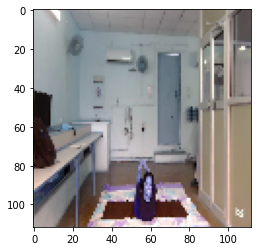

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0][1])

In [ ]:
y_train[0]

3

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        cam = cv2.VideoCapture(video)
        success,image = cam.read()

        frames = []
        while success:
          frames.append(cv2.resize(image,(112,112)))
          success,image = cam.read()

        fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        startingFrame = random.randint(0, fps-16-1)
        frames = frames[startingFrame:startingFrame+16]
        # plt.imshow(frames[0])
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

Mounted at /MyDrive
1


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


2


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


3


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


4


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


5


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


6


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


7


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


8


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


9


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


10


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


11


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


12


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


13


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


14


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


15


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


16


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


17


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


18


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


19


Traceback (most recent call last):
  File "<ipython-input-2-aafca14d0021>", line 49, in <module>
    plt.imshow(frames[0])
NameError: name 'plt' is not defined


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 16*512, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))



In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        cam = cv2.VideoCapture(video)
        success,image = cam.read()

        frames = []
        while success:
          frames.append(cv2.resize(image,(112,112)))
          success,image = cam.read()

        fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        startingFrame = random.randint(0, fps-16-1)
        frames = frames[startingFrame:startingFrame+16]
        # plt.imshow(frames[0])
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

import numpy as np
arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 16*512, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'mean_squared_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)



Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


KeyboardInterrupt: ignored

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        cam = cv2.VideoCapture(video)
        success,image = cam.read()

        frames = []
        while success:
          frames.append(cv2.resize(image,(112,112)))
          success,image = cam.read()

        fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        startingFrame = random.randint(0, fps-16-1)
        frames = frames[startingFrame:startingFrame+16]
        # plt.imshow(frames[0])
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

# import numpy as np
# arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
# np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


In [ ]:
train_videos.shape

(1151, 16, 112, 112, 3)

In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 16*512, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'mean_squared_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Epoch 1/400
22/22 [==============================] - 76s 3s/step - loss: 6440.6675 - accuracy: 0.0536 - val_loss: 6359.5044 - val_accuracy: 0.0578
Epoch 2/400
22/22 [==============================] - 45s 2s/step - loss: 6289.1138 - accuracy: 0.0536 - val_loss: 6208.9258 - val_accuracy: 0.0578
Epoch 3/400
22/22 [==============================] - 46s 2s/step - loss: 6139.3906 - accuracy: 0.0623 - val_loss: 6060.1782 - val_accuracy: 0.0578
Epoch 4/400
22/22 [==============================] - 46s 2s/step - loss: 5991.4990 - accuracy: 0.0580 - val_loss: 5913.2607 - val_accuracy: 0.0578
Epoch 5/400
22/22 [==============================] - 46s 2s/step - loss: 5845.4370 - accuracy: 0.0507 - val_loss: 5768.1738 - val_accuracy: 0.0578
Epoch 6/400
22/22 [==============================] - 46s 2s/step - loss: 5701.2051 - accuracy: 0.0594 - val_loss: 5624.9141 - val_accuracy: 0.0578
Epoch 7/400
22/22 [==============================] - 46s 2s/step - loss: 5558.8027 - accuracy: 0.0652 - val_loss: 5483

KeyboardInterrupt: ignored

In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 256, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'mean_squared_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Epoch 1/400
22/22 [==============================] - 48s 2s/step - loss: 290.8534 - accuracy: 0.0638 - val_loss: 288.1069 - val_accuracy: 0.0636
Epoch 2/400
22/22 [==============================] - 45s 2s/step - loss: 286.0312 - accuracy: 0.0551 - val_loss: 283.3074 - val_accuracy: 0.0636
Epoch 3/400
22/22 [==============================] - 45s 2s/step - loss: 281.2515 - accuracy: 0.0391 - val_loss: 278.5503 - val_accuracy: 0.0636
Epoch 4/400
22/22 [==============================] - 45s 2s/step - loss: 276.5143 - accuracy: 0.0420 - val_loss: 273.8356 - val_accuracy: 0.0636
Epoch 5/400
22/22 [==============================] - 45s 2s/step - loss: 271.8193 - accuracy: 0.0580 - val_loss: 269.1630 - val_accuracy: 0.0636
Epoch 6/400
22/22 [==============================] - 45s 2s/step - loss: 267.1666 - accuracy: 0.0565 - val_loss: 264.5329 - val_accuracy: 0.0636
Epoch 7/400
22/22 [==============================] - 45s 2s/step - loss: 262.5563 - accuracy: 0.0449 - val_loss: 259.9452 - val_ac

KeyboardInterrupt: ignored

In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 512, activation = 'relu',kernel_regularizer='l1_l2'))


RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 512, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Epoch 1/400
22/22 [==============================] - 48s 2s/step - loss: 669.7354 - accuracy: 0.0507 - val_loss: 664.0630 - val_accuracy: 0.0520
Epoch 2/400
22/22 [==============================] - 45s 2s/step - loss: 659.4317 - accuracy: 0.0478 - val_loss: 653.8057 - val_accuracy: 0.0520
Epoch 3/400
22/22 [==============================] - 45s 2s/step - loss: 649.2153 - accuracy: 0.0435 - val_loss: 643.6362 - val_accuracy: 0.0520
Epoch 4/400
22/22 [==============================] - 45s 2s/step - loss: 639.0871 - accuracy: 0.0464 - val_loss: 633.5551 - val_accuracy: 0.0520
Epoch 5/400
22/22 [==============================] - 45s 2s/step - loss: 629.0471 - accuracy: 0.0478 - val_loss: 623.5620 - val_accuracy: 0.0520
Epoch 6/400
22/22 [==============================] - 45s 2s/step - loss: 619.0950 - accuracy: 0.0536 - val_loss: 613.6567 - val_accuracy: 0.0520
Epoch 7/400
22/22 [==============================] - 45s 2s/step - loss: 609.2310 - accuracy: 0.0464 - val_loss: 603.8395 - val_ac

In [ ]:
import keras
from keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from keras.optimizers import SGD

# Input layer
input_layer = Input(shape=(16, 112, 112, 3))

# 3D Convolutional layer with ReLU activation
x = Conv3D(32, (3, 3, 3), activation='relu')(input_layer)
x = MaxPooling3D((1, 2, 2), strides=(1, 2, 2))(x)

x = Conv3D(64, (3, 3, 3), activation='relu')(x)
x = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(x)

x = Conv3D(128, (3, 3, 3), activation='relu')(x)
x = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(x)

x = Conv3D(256, (3, 3, 3), activation='relu')(x)
x = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(x)

x = Conv3D(512, (3, 3, 3), activation='relu')(x)
x = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(x)

# Flattening and passing through fully connected layers with dropout
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer='l1')(x)
x = Dropout(0.5)(x)

# Output layer with softmax activation
output_layer = Dense(5, activation='softmax')(x)

# Defining the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compiling the model with SGD optimizer
optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, validation_split = 0.2)

ValueError: ignored

In [ ]:
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model
drive.mount('/MyDrive')

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).


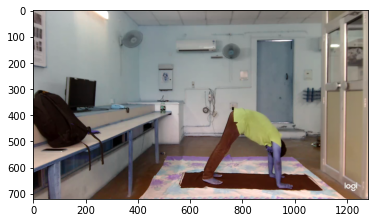

In [ ]:
import cv2
import matplotlib.pyplot as plt
video = cv2.VideoCapture('../MyDrive/MyDrive/Dataset/Adhomukhasvanasana/1.mp4')
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frame_interval = total_frames//16
frames = []

for i in range(0,16):
  video.set(cv2.CAP_PROP_POS_FRAMES, i*frame_interval)
  success,frame = video.read()
  if success:
    frames.append(frame)
    plt.imshow(frame)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        # cam = cv2.VideoCapture(video)
        # success,image = cam.read()

        # frames = []
        # while success:
        #   frames.append(cv2.resize(image,(112,112)))
        #   success,image = cam.read()

        # fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        # startingFrame = random.randint(0, fps-16-1)
        # frames = frames[startingFrame:startingFrame+16]

        video = cv2.VideoCapture('../MyDrive/MyDrive/Dataset/Adhomukhasvanasana/1.mp4')
        total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_interval = total_frames//16
        frames = []

        for i in range(0,16):
          video.set(cv2.CAP_PROP_POS_FRAMES, i*frame_interval)
          success,image = video.read()
          if success:
            frames.append(cv2.resize(image,(112,112)))

        # plt.imshow(frames[0])
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

# import numpy as np
# arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
# np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


In [ ]:
import keras
from keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from keras.optimizers import SGD

# Input layer
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))


# 3D Convolutional layer with ReLU activation
RGBmodel.add(Conv3D(32, (3, 3, 3), activation='relu'))
RGBmodel.add(MaxPooling3D((1, 2, 2), strides=(1, 2, 2)))

RGBmodel.add(Conv3D(64, (3, 3, 3), activation='relu'))
RGBmodel.add(MaxPooling3D((2, 2, 2), strides=(2, 2, 2)))

RGBmodel.add(Conv3D(128, (3, 3, 3), activation='relu'))
RGBmodel.add(MaxPooling3D((2, 2, 2), strides=(2, 2, 2)))

RGBmodel.add(Conv3D(256, (3, 3, 3), activation='relu'))
RGBmodel.add(MaxPooling3D((2, 2, 2), strides=(2, 2, 2)))

RGBmodel.add(Conv3D(512, (3, 3, 3), activation='relu'))
RGBmodel.add(MaxPooling3D((2, 2, 2), strides=(2, 2, 2)))

# Flattening and passing through fully connected layers with dropout
RGBmodel.add(Flatten())
RGBmodel.add(Dense(1024, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(512, activation='relu', kernel_regularizer='l1'))
RGBmodel.add(Dropout(0.5))

# Output layer with softmax activation
RGBmodel.add(Dense(5, activation='softmax'))

# Defining the model
# model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compiling the model with SGD optimizer
optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, validation_split = 0.2)

ValueError: ignored

In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 512, activation = 'relu',kernel_regularizer='l1_l2'))


RGBmodel.add(Dropout(0.5))
RGBmodel.add(Dense(units = 512, activation = 'relu',kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 256, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))

# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 128, activation = 'relu', 
#                 # kernel_initializer = initializers.HeUniform(),
#                 kernel_regularizer='l1_l2'))


# RGBmodel.add(Dropout(0.5))
# RGBmodel.add(Dense(units = 64, activation = 'relu', 
#                 # kernel_initializer = initializers.GlorotUniform(),
#                 kernel_regularizer='l1_l2'))

RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Epoch 1/400
22/22 [==============================] - 73s 2s/step - loss: 675.5838 - accuracy: 0.3304 - val_loss: 670.0836 - val_accuracy: 1.0000
Epoch 2/400
22/22 [==============================] - 45s 2s/step - loss: 665.2805 - accuracy: 0.3014 - val_loss: 659.8275 - val_accuracy: 1.0000
Epoch 3/400
22/22 [==============================] - 44s 2s/step - loss: 655.0654 - accuracy: 0.2870 - val_loss: 649.6592 - val_accuracy: 0.0000e+00
Epoch 4/400
22/22 [==============================] - 45s 2s/step - loss: 644.9385 - accuracy: 0.3304 - val_loss: 639.5794 - val_accuracy: 0.0000e+00
Epoch 5/400
22/22 [==============================] - 45s 2s/step - loss: 634.8998 - accuracy: 0.3159 - val_loss: 629.5875 - val_accuracy: 0.0000e+00
Epoch 6/400
22/22 [==============================] - 45s 2s/step - loss: 624.9492 - accuracy: 0.2928 - val_loss: 619.6838 - val_accuracy: 0.0000e+00
Epoch 7/400
22/22 [==============================] - 45s 2s/step - loss: 615.0868 - accuracy: 0.3029 - val_loss: 6

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from keras.optimizers import SGD

num_classes = 19

model = Sequential()

model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', input_shape=(16, 112, 112, 3), data_format = 'channels_last'))
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))
model.add(Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu'))
model.add(Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))
model.add(Conv3D(filters=512, kernel_size=(3, 3, 3), activation='relu'))
model.add(Conv3D(filters=512, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=num_classes, activation='softmax'))

sgd = SGD(lr=0.001, decay=0.0, momentum=0.9, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


ValueError: ignored

In [ ]:
for i in range(len(model.layers)):
  print(model.layers[i].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 110, 110, 64), dtype=tf.float32, name=None), name='conv3d_90/Relu:0', description="created by layer 'conv3d_90'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 55, 55, 64), dtype=tf.float32, name=None), name='max_pooling3d_56/MaxPool3D:0', description="created by layer 'max_pooling3d_56'")
KerasTensor(type_spec=TensorSpec(shape=(None, 12, 53, 53, 128), dtype=tf.float32, name=None), name='conv3d_91/Relu:0', description="created by layer 'conv3d_91'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 26, 26, 128), dtype=tf.float32, name=None), name='max_pooling3d_57/MaxPool3D:0', description="created by layer 'max_pooling3d_57'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 24, 24, 256), dtype=tf.float32, name=None), name='conv3d_92/Relu:0', description="created by layer 'conv3d_92'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 22, 22, 256), dtype=tf.float32, name=None), name='conv3d_93/Relu:0', description="created by layer '

In [ ]:
X_train.shape

(863, 16, 112, 112, 3)

In [ ]:
input_shape =(32,16,112,112,3)
num_classes = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
# RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same',input_shape=input_shape[1:], data_format = 'channels_last'))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))

RGBmodel.add(Dense(units=num_classes, activation='softmax'))

sgd = SGD(lr=0.001, decay=0.0, momentum=0.9, nesterov=False)
RGBmodel.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Epoch 1/100


ValueError: ignored

In [ ]:
len(RGBmodel.layers)

20

In [ ]:
for i in range(len(RGBmodel.layers)):
  print(RGBmodel.layers[i].output)


KerasTensor(type_spec=TensorSpec(shape=(None, 16, 112, 112, 64), dtype=tf.float32, name=None), name='conv3d_108/Relu:0', description="created by layer 'conv3d_108'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 56, 56, 64), dtype=tf.float32, name=None), name='max_pooling3d_67/MaxPool3D:0', description="created by layer 'max_pooling3d_67'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 56, 56, 128), dtype=tf.float32, name=None), name='conv3d_109/Relu:0', description="created by layer 'conv3d_109'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 28, 28, 128), dtype=tf.float32, name=None), name='max_pooling3d_68/MaxPool3D:0', description="created by layer 'max_pooling3d_68'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 28, 28, 256), dtype=tf.float32, name=None), name='conv3d_110/Relu:0', description="created by layer 'conv3d_110'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 28, 28, 256), dtype=tf.float32, name=None), name='conv3d_111/Relu:0', description="created by 

In [ ]:
X_train.shape

(863, 16, 112, 112, 3)

In [ ]:

################### RUN THIS CELL


# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        # Open the video file
        cap = cv2.VideoCapture(video)

        # Get the total number of frames in the video
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Select a random starting frame number
        start_frame = random.randint(0, total_frames - 16)

        # Set the number of frames to be selected
        num_frames = 16

        # Set the frame number to start with
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        # Loop through the frames and save them
        frames = []
        for j in range(num_frames):
            ret, image = cap.read()
            if ret:
              frames.append(cv2.resize(image,(112,112)))

        # Release the video file
        cap.release()

        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

# import numpy as np
# arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
# np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
# RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same',input_shape=input_shape[1:]))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))


RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)

# Print the summary of the model
RGBmodel.summary()

Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


In [ ]:
input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
# RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same',input_shape=input_shape[1:]))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))


RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        # cam = cv2.VideoCapture(video)
        # success,image = cam.read()

        # frames = []
        # while success:
        #   frames.append(cv2.resize(image,(112,112)))
        #   success,image = cam.read()

        # fps = cam.get(cv2.CAP_PROP_FRAME_COUNT)
        # startingFrame = random.randint(0, fps-16-1)
        # frames = frames[startingFrame:startingFrame+16]

        video = cv2.VideoCapture('../MyDrive/MyDrive/Dataset/Adhomukhasvanasana/1.mp4')
        total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_interval = total_frames//16
        frames = []

        for j in range(0,16):
          video.set(cv2.CAP_PROP_POS_FRAMES, i*frame_interval)
          success,image = video.read()
          if success:
            frames.append(cv2.resize(image,(112,112)))

        # plt.imshow(frames[0])
        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

# import numpy as np
# arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
# np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)



input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
# RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same',input_shape=input_shape[1:]))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))


RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 400, validation_split = 0.2)


from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)


Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


KeyboardInterrupt: ignored

In [ ]:

################### RUN THIS CELL


# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Videos'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
import traceback
import random

num = 1

for i,folder in enumerate(labels):
    try:
      for video in os.listdir(data_path+'/'+folder):
        print(num)
        num+=1
        video = os.path.join(data_path+'/'+folder+'/'+video)
        # Open the video file
        cap = cv2.VideoCapture(video)

        # Get the total number of frames in the video
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Select a random starting frame number
        start_frame = random.randint(0, total_frames - 16)

        # Set the number of frames to be selected
        num_frames = 16

        # Set the frame number to start with
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        # Loop through the frames and save them
        frames = []
        for j in range(num_frames):
            ret, image = cap.read()
            if ret:
              frames.append(cv2.resize(image,(112,112)))

        # Release the video file
        cap.release()

        train_videos.append(frames)
        train_labels.append(i)

    except Exception:
      traceback.print_exc()
train_videos = np.asarray(train_videos)
train_labels = np.asarray(train_labels).astype('int64')

# import numpy as np
# arr_reshaped = train_videos.reshape(train_videos.shape[0], -1) #1151
# np.savetxt("dataset.txt", arr_reshaped)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_videos,train_labels,test_size=0.25,shuffle=True)

input_shape =(32,16,112,112,3)
output_shape = 19

tf.keras.regularizers.L1L2(
    l1=0.01, l2=0.1
)

RGBmodel = Sequential()

# model.add(RandomFlip("horizontal"))
# model.add(RandomRotation(0.1))
# RGBmodel.add(Rescaling(1.0 / 255,input_shape=input_shape[1:]))
RGBmodel.add(Conv3D(64,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same',input_shape=input_shape[1:]))
RGBmodel.add(MaxPooling3D(pool_size=(1, 2, 2),strides =(1,2,2)))    #maxPool-1

RGBmodel.add(Conv3D(128,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-2
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3a
RGBmodel.add(Conv3D(256,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-3b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-4b
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))

RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5a
RGBmodel.add(Conv3D(512,kernel_size=(3,3,3),strides=(1, 1, 1),activation='relu',padding = 'same')) #conv3d-5b

RGBmodel.add(ZeroPadding3D(padding=(0,1,1)))
RGBmodel.add(MaxPooling3D(pool_size=(2, 2, 2),strides =(2,2,2)))
RGBmodel.add(Flatten())

RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l2'))
RGBmodel.add(Dropout(rate=0.5))
RGBmodel.add(Dense(units=4096, activation='relu', kernel_regularizer='l1'))


RGBmodel.add(Dense(units = output_shape, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 50, validation_split = 0.2)


# from keras.optimizers import SGD
# opt = SGD(learning_rate=0.0001)
# RGBmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
# RGBmodel.fit(X_train,y_train,batch_size=32,epochs = 100, validation_split = 0.2)

# Print the summary of the model
RGBmodel.summary()

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248

In [ ]:
#chatgpt

import tensorflow as tf

# Define the input shape
input_shape = (16, 112, 112, 3)

# Define the model architecture
model = tf.keras.models.Sequential([
    # Backbone structure
    tf.keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), padding='same'),
    tf.keras.layers.Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same'),
    tf.keras.layers.Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same'),
    tf.keras.layers.Conv3D(512, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv3D(512, kernel_size=(3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same'),

    # Regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Classification
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.0, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
#chatgpt
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(16, 112, 112, 3)),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit_generator(train_generator, steps_per_epoch=train_steps, epochs=num_epochs, validation_data=val_generator, validation_steps=val_steps, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print('Test accuracy:', test_acc)


In [ ]:
#chatgpt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(16, 112, 112, 3)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(256, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()


In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (None, 224, 224, 3)

# Define the model
PoseModel = tf.keras.Sequential()

# Add the CNN layers
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape))
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))))
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')))
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))))
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(50, (3, 3), activation='relu')))
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))))

# Flatten the output from CNN layers
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalAveragePooling2D()))

# Add the LSTM layer
PoseModel.add(tf.keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.2, return_sequences=True))

# Add the fully connected layer
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(80, activation='relu')))
PoseModel.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
PoseModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_classes, activation='softmax')))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
PoseModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the summary of the model
PoseModel.summary()


In [ ]:
!pip install mediapipe
import cv2
import mediapipe as mp
import numpy as np

BODY_PARTS = {0: 'NOSE',
             1: 'NECK',
             2: 'RIGHT_SHOULDER',
             3: 'RIGHT_ELBOW',
             4: 'RIGHT_WRIST',
             5: 'LEFT_SHOULDER',
             6: 'LEFT_ELBOW',
             7: 'LEFT_WRIST',
             8: 'MID_HIP',
             9: 'RIGHT_HIP',
             10: 'RIGHT_KNEE',
             11: 'RIGHT_ANKLE',
             12: 'LEFT_HIP',
             13: 'LEFT_KNEE',
             14: 'LEFT_ANKLE',
             15: 'RIGHT_EYE',
             16: 'LEFT_EYE',
             17: 'RIGHT_EAR',
             18: 'LEFT_EAR',
             19: 'LEFT_BIG_TOE',
             20: 'LEFT_SMALL_TOE',
             21: 'LEFT_HEEL',
             22: 'RIGHT_BIG_TOE',
             23: 'RIGHT_SMALL_TOE',
             24: 'RIGHT_HEEL'}

POSE_PAIRS = [[17,15],[15,0],[16,0],[16,18],[0,1],[2,1],[1,5],[2,3],[3,4],[5,6],[6,7],
              [1,8],[9,8],[8,12],[9,10],[12,13],[10,11],[13,14],[11,22],[11,24],[23,22],[14,19],[14,21],[19,20]]


numOfKeypoints = 23
image_width=600 
image_height=600
drawing_details = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def getKeyPoints(frame):
    keypoints = [[None,None]] * numOfKeypoints
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as mp: 
        photo_height = frame.shape[0]
        photo_width = frame.shape[1]

        cvtImg = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        res = mp.process(cvtImg)
        if(res == None or res.pose_landmarks == None):
            return keypoints,frame
#         drawing_details.draw_landmarks(frame,res.left_hand_landmarks,mp_pose.HAND_CONNECTIONS)
#         drawing_details.draw_landmarks(frame,res.right_hand_landmarks,mp_pose.HAND_CONNECTIONS)
        dictt = dict()
        for e in BODY_PARTS:
            if(BODY_PARTS[e] not in mp_pose.PoseLandmark.__members__):
                continue
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark[BODY_PARTS[e]]]
            dictt[BODY_PARTS[e]] = {'x':mark.x,'y':mark.y,'z':mark.z}

        #------------------------------------------------------------------------------------------------
        try:
            dictt['MID_HIP'] = {'x' : (dictt['LEFT_HIP']['x'] + dictt['RIGHT_HIP']['x'])/2,
                               'y' : (dictt['LEFT_HIP']['y'] + dictt['RIGHT_HIP']['y'])/2,
                               'z' : (dictt['LEFT_HIP']['z'] + dictt['RIGHT_HIP']['z'])/2}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            dictt['NECK'] = {'x' : (dictt['LEFT_SHOULDER']['x'] + dictt['RIGHT_SHOULDER']['x'])/2,
                               'y' : (dictt['LEFT_SHOULDER']['y'] + dictt['RIGHT_SHOULDER']['y'])/2,
                               'z' : (dictt['LEFT_SHOULDER']['z'] + dictt['RIGHT_SHOULDER']['z'])/2}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark['RIGHT_FOOT_INDEX']]
            dictt['RIGHT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark['LEFT_FOOT_INDEX']]
            dictt['LEFT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
        except:
            pass

        #------------------------------------------------------------------------------------------------

        
        for i,j in BODY_PARTS.items():
            try:
                keypoints[i][0] = dictt[j]['x']
                keypoints[i][1] = dictt[j]['y']
            except:
                pass

    return keypoints,frame


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 47.9 MB/s eta 0:00:00


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
train_keypoints = []
import traceback
import random

num = 1

for i,folder in enumerate(labels):
  try:
    for video in os.listdir(data_path+'/'+folder):
      print(num)
      num+=1
      video = os.path.join(data_path+'/'+folder+'/'+video)
      # Open the video file
      cap = cv2.VideoCapture(video)

      # Get the total number of frames in the video
      total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

      # Select a random starting frame number
      start_frame = random.randint(0, total_frames - 16)

      # Set the number of frames to be selected
      num_frames = 16

      # Set the frame number to start with
      cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

      # Loop through the frames and save them
      frames = []
      keypoints = []
      for j in range(num_frames):
          ret, image = cap.read()
          if ret:
            # frames.append(cv2.resize(image,(112,112)))
            kk,ff = getKeyPoints(image)
            keypoints.append(kk)

      # Release the video file
      cap.release()

      # train_videos.append(frames)
      train_keypoints.append(keypoints)
      train_labels.append(i)

  except Exception:
    traceback.print_exc()




Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248

In [ ]:
# train_videos = np.asarray(train_videos)
train_keypoints = np.asarray(train_keypoints)
train_labels = np.asarray(train_labels).astype('int32')

# train_keypoints = tf.convert_to_tensor(train_keypoints, dtype=tf.float32)
# # yKey_train = tf.cast(yKey_train , dtype=tf.float32)
# train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)

# train_keypoints = np.array([np.array(val) for val in train_keypoints])

from sklearn.model_selection import train_test_split

XKey_train,XKey_test,yKey_train,yKey_test = train_test_split(train_keypoints,train_labels,test_size=0.25,shuffle=True)

In [ ]:
XKey_train = tf.convert_to_tensor(XKey_train, dtype=tf.float32)
yKey_train = tf.convert_to_tensor(yKey_train, dtype=tf.float32)

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import GlorotNormal
from keras.regularizers import L1L2

# Define model input shape
input_shape = (16, 23, 2)

# Build model architecture
model = models.Sequential()

model.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='relu')))
model.add(TimeD   istributed(MaxPooling1D(pool_size=2)))

# flatten output from CNN layers
model.add(TimeDistributed(GlobalAveragePooling1D()))

# add LSTM layer
model.add(LSTM(100, dropout=0.0, recurrent_dropout=0.0, kernel_initializer=GlorotNormal(seed=42), recurrent_regularizer=L1L2(l1=0.0, l2=0.001), bias_regularizer=L1L2(l1=0.0, l2=0.001), recurrent_initializer=GlorotNormal(seed=42), return_sequences=True))

# add fully connected layers
model.add(TimeDistributed(Dense(80, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))

# add Softmax layer
model.add(TimeDistributed(Dense(19, activation='softmax')))

# compile model
adam = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# print model summary
# print(model.summary())

model.fit(XKey_train,yKey_train,batch_size=32,epochs = 50)

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import GlorotNormal
from keras.regularizers import L1L2

# define model
model = Sequential()

# add CNN layers  



model.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(None, NoOfKeypoints, 2))))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# flatten output from CNN layers
model.add(TimeDistributed(GlobalAveragePooling1D()))

# add LSTM layer
model.add(LSTM(100, dropout=0.0, recurrent_dropout=0.0, kernel_initializer=GlorotNormal(seed=42), recurrent_regularizer=L1L2(l1=0.0, l2=0.001), bias_regularizer=L1L2(l1=0.0, l2=0.001), recurrent_initializer=GlorotNormal(seed=42), return_sequences=True))

# add fully connected layers
model.add(TimeDistributed(Dense(80, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))

# add fully connected layers
model.add(TimeDistributed(Dense(80, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))

# add Softmax layer
model.add(TimeDistributed(Dense(8, activation='softmax')))

# compile model
adam = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# print model summary
# print(model.summary())

model.fit(XKey_train,yKey_train,batch_size=32,epochs = 50)




Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
from keras import models, layers

# Define model input shape
input_shape = (16, 25, 2)

# Build model architecture
model = models.Sequential()

# First time-distributed CNN layer
model.add(layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# Second time-distributed CNN layer
model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# Third time-distributed CNN layer
model.add(layers.TimeDistributed(layers.Conv2D(50, (3, 3), activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# Flatten output from CNN layers
model.add(layers.TimeDistributed(layers.Flatten()))

# Regularized LSTM layer
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Time-distributed fully connected layer
model.add(layers.TimeDistributed(layers.Dense(80, activation='relu')))
model.add(layers.TimeDistributed(layers.Dropout(0.5)))

# Softmax output layer
model.add(layers.TimeDistributed(layers.Dense(num_classes, activation='softmax')))

# Compile model with appropriate loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


ValueError: ignored

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import GlorotNormal
from keras.regularizers import L1L2

# Define model input shape
input_shape = (16, 23, 2)

# Build model architecture
model = models.Sequential()

model.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# flatten output from CNN layers
model.add(TimeDistributed(GlobalAveragePooling1D()))

# add LSTM layer
model.add(LSTM(100, dropout=0.0, recurrent_dropout=0.0, kernel_initializer=GlorotNormal(seed=42), recurrent_regularizer=L1L2(l1=0.0, l2=0.001), bias_regularizer=L1L2(l1=0.0, l2=0.001), recurrent_initializer=GlorotNormal(seed=42), return_sequences=True))

# add fully connected layers
model.add(TimeDistributed(Dense(80, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))

# add Softmax layer
model.add(TimeDistributed(Dense(19, activation='softmax')))

# compile model
adam = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# print model summary
# print(model.summary())

model.fit(XKey_train,yKey_train,batch_size=32,epochs = 50)

NameError: ignored

In [ ]:
for i in range(len(model.layers)):
  print(model.layers[i].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 21, 16), dtype=tf.float32, name=None), name='time_distributed_31/Reshape_1:0', description="created by layer 'time_distributed_31'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 10, 16), dtype=tf.float32, name=None), name='time_distributed_32/Reshape_1:0', description="created by layer 'time_distributed_32'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 8, 128), dtype=tf.float32, name=None), name='time_distributed_33/Reshape_1:0', description="created by layer 'time_distributed_33'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 4, 128), dtype=tf.float32, name=None), name='time_distributed_34/Reshape_1:0', description="created by layer 'time_distributed_34'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 2, 50), dtype=tf.float32, name=None), name='time_distributed_35/Reshape_1:0', description="created by layer 'time_distributed_35'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 1, 50), dtype=tf.float32, name=None)

In [ ]:
!pip install mediapipe
import cv2
import mediapipe as mp
import numpy as np

BODY_PARTS = {0: 'NOSE',
             1: 'NECK',
             2: 'RIGHT_SHOULDER',
             3: 'RIGHT_ELBOW',
             4: 'RIGHT_WRIST',
             5: 'LEFT_SHOULDER',
             6: 'LEFT_ELBOW',
             7: 'LEFT_WRIST',
             8: 'MID_HIP',
             9: 'RIGHT_HIP',
             10: 'RIGHT_KNEE',
             11: 'RIGHT_ANKLE',
             12: 'LEFT_HIP',
             13: 'LEFT_KNEE',
             14: 'LEFT_ANKLE',
             15: 'RIGHT_EYE',
             16: 'LEFT_EYE',
             17: 'RIGHT_EAR',
             18: 'LEFT_EAR',
             19: 'LEFT_BIG_TOE',
             20: 'LEFT_HEEL',
             21: 'RIGHT_BIG_TOE',
             22: 'RIGHT_HEEL'}

POSE_PAIRS = [[17,15],[15,0],[16,0],[16,18],[0,1],[2,1],[1,5],[2,3],[3,4],[5,6],[6,7],
              [1,8],[9,8],[8,12],[9,10],[12,13],[10,11],[13,14],[11,22],[11,24],[23,22],[14,19],[14,21],[19,20]]


numOfKeypoints = 23
image_width=600 
image_height=600
drawing_details = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def getKeyPoints(frame):
    keypoints = [[None,None]]*numOfKeypoints 
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as mp: 
        photo_height = frame.shape[0]
        photo_width = frame.shape[1]

        cvtImg = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        res = mp.process(cvtImg)
        if(res == None or res.pose_landmarks == None):
            return keypoints,frame
#         drawing_details.draw_landmarks(frame,res.left_hand_landmarks,mp_pose.HAND_CONNECTIONS)
#         drawing_details.draw_landmarks(frame,res.right_hand_landmarks,mp_pose.HAND_CONNECTIONS)
        dictt = dict()
        for e in BODY_PARTS:
            if(BODY_PARTS[e] not in mp_pose.PoseLandmark.__members__):
                continue
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark[BODY_PARTS[e]]]
            dictt[BODY_PARTS[e]] = {'x':mark.x,'y':mark.y,'z':mark.z}

        
        #------------------------------------------------------------------------------------------------
        try:
            dictt['MID_HIP'] = {'x' : (dictt['LEFT_HIP']['x'] + dictt['RIGHT_HIP']['x'])/2,
                               'y' : (dictt['LEFT_HIP']['y'] + dictt['RIGHT_HIP']['y'])/2,
                               'z' : (dictt['LEFT_HIP']['z'] + dictt['RIGHT_HIP']['z'])/2}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            dictt['NECK'] = {'x' : (dictt['LEFT_SHOULDER']['x'] + dictt['RIGHT_SHOULDER']['x'])/2,
                               'y' : (dictt['LEFT_SHOULDER']['y'] + dictt['RIGHT_SHOULDER']['y'])/2,
                               'z' : (dictt['LEFT_SHOULDER']['z'] + dictt['RIGHT_SHOULDER']['z'])/2}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark['RIGHT_FOOT_INDEX']]
            dictt['RIGHT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
        except:
            pass

        #------------------------------------------------------------------------------------------------
        try:
            mark = res.pose_landmarks.landmark[mp_pose.PoseLandmark['LEFT_FOOT_INDEX']]
            dictt['LEFT_BIG_TOE'] = {'x':mark.x,'y':mark.y,'z':mark.z}
        except:
            pass

        #------------------------------------------------------------------------------------------------

       

        for i,j in BODY_PARTS.items():
          # print(j)
          try:
              keypoints[i] = [dictt[j]['x'],dictt[j]['y']]
          except Exception as e:
            pass


        # for pair in POSE_PAIRS:
        #     partFrom = pair[0]
        #     partTo = pair[1]

        #     assert(partFrom in BODY_PARTS)
        #     assert(partTo in BODY_PARTS)

        #     if(BODY_PARTS[partFrom] in dictt and BODY_PARTS[partTo] in dictt):
        #         idFrom = BODY_PARTS[partFrom]
        #         idTo = BODY_PARTS[partTo]
        #         if dictt[idFrom] and dictt[idTo]:
        #             pt1 = (int(dictt[idFrom]['x']*photo_width),int(dictt[idFrom]['y']*photo_height))
        #             pt2 = (int(dictt[idTo]['x']*photo_width),int(dictt[idTo]['y']*photo_height))

        #             cv2.line(frame, pt1,pt2, (0, 255, 0), 3) 
        #             cv2.ellipse (frame, pt1, (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED) 
        #             cv2.ellipse (frame, pt2, (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    return keypoints,frame





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 34.4 MB/s eta 0:00:00


In [ ]:

""
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset/Tadasana/5.mp4'

cap = cv2.VideoCapture(data_path)
ret, image = cap.read()
kk,ff = getKeyPoints(image)
# import matplotlib.pyplot as plt
# print(image.shape)
# plt.imshow(ff)
# print(kk)
# res = [i for i, val in enumerate(kk) if val == [None,None]]
# print(res)

print(kk)

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).
[[0.5961642861366272, 0.2014855444431305], [0.5967467427253723, 0.23941335082054138], [0.5689355134963989, 0.23851945996284485], [0.5616152882575989, 0.14141714572906494], [0.5798712372779846, 0.05728411674499512], [0.6245579719543457, 0.24030724167823792], [0.6341019868850708, 0.14760473370552063], [0.6227884292602539, 0.05420631170272827], [0.5947988033294678, 0.4399060159921646], [0.5756978392601013, 0.4406645596027374], [0.5778211951255798, 0.582804799079895], [0.5734312534332275, 0.7016423344612122], [0.6138997673988342, 0.4391474723815918], [0.6190651059150696, 0.5812750458717346], [0.6245545148849487, 0.714583694934845], [0.5896872282028198, 0.18975108861923218], [0.602667510509491, 0.19079063832759857], [0.5834235548973083, 0.19187818467617035], [0.6093487739562988, 0.1945313811302185], [0.6360316276550293, 0.7564417719841003], [0.6217788457870483, 0.732707917690

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.layers import Conv3D, MaxPooling3D,Dense,ZeroPadding3D,Flatten,Activation,BatchNormalization,RandomFlip,RandomRotation,Rescaling
from keras.models import load_model

# This will prompt for authorization.
drive.mount('/MyDrive')

import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '../MyDrive/MyDrive/Dataset'


labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107



train_videos=[]
train_labels=[]
train_keypoints = []
import traceback
import random

num = 1

for i,folder in enumerate(labels):
  try:
    for video in os.listdir(data_path+'/'+folder):
      print(num)
      num+=1
      video = os.path.join(data_path+'/'+folder+'/'+video)
      # Open the video file
      cap = cv2.VideoCapture(video)

      # Get the total number of frames in the video
      total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

      # Select a random starting frame number
      start_frame = random.randint(0, total_frames - 16)

      # Set the number of frames to be selected
      num_frames = 16

      # Set the frame number to start with
      cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

      # Loop through the frames and save them
      frames = []
      keypoints = []
      consider = True
      for j in range(num_frames):
          ret, image = cap.read()
          if ret:
            # frames.append(cv2.resize(image,(112,112)))
            kk,ff = getKeyPoints(image)
            # res = [i for i, val in enumerate(kk) if val == [None,None]]
            # if(len(res)>0):
            #   consider = False
            keypoints.append(kk)

      # Release the video file
      cap.release()
      
      # if(consider==False):
      #   continue
      # train_videos.append(frames)
      train_keypoints.append(keypoints)
      train_labels.append(i)

  except Exception:
    traceback.print_exc()




Mounted at /MyDrive
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


Traceback (most recent call last):
  File "<ipython-input-4-60db9329f600>", line 53, in <cell line: 40>
    start_frame = random.randint(0, total_frames - 16)
  File "/usr/lib/python3.9/random.py", line 338, in randint
    return self.randrange(a, b+1)
  File "/usr/lib/python3.9/random.py", line 316, in randrange
    raise ValueError("empty range for randrange() (%d, %d, %d)" % (istart, istop, width))
ValueError: empty range for randrange() (0, -15, -15)


414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663


In [ ]:
train_keypoints

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# train_videos = np.asarray(train_videos)
train_keypoints_n = np.asarray(train_keypoints)
train_labels_n = np.asarray(train_labels).astype('int32')

# train_keypoints = tf.convert_to_tensor(train_keypoints, dtype=tf.float32)
# # yKey_train = tf.cast(yKey_train , dtype=tf.float32)
# train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)

# train_keypoints = np.array([np.array(val) for val in train_keypoints])

from sklearn.model_selection import train_test_split

XKey_train,XKey_test,yKey_train,yKey_test = train_test_split(train_keypoints_n,train_labels_n,test_size=0.25,shuffle=True)

In [ ]:
XKey_train = tf.convert_to_tensor(XKey_train, dtype=tf.float32)
yKey_train = tf.convert_to_tensor(yKey_train, dtype=tf.int32)

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import GlorotNormal
from keras.regularizers import L1L2

# yKey_train = np.squeeze(yKey_train)

tf.config.run_functions_eagerly(True)

# Define model input shape
input_shape = (16, 23, 2)

# Build model architecture
model = models.Sequential()

model.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'),input_shape = input_shape))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# flatten output from CNN layers
model.add(TimeDistributed(GlobalAveragePooling1D()))

# add LSTM layer
# model.add(LSTM(100, dropout=0.0, recurrent_dropout=0.0, kernel_initializer=GlorotNormal(seed=42), recurrent_regularizer=L1L2(l1=0.01, l2=0.001), bias_regularizer=L1L2(l1=0.01, l2=0.001), recurrent_initializer=GlorotNormal(seed=42), return_sequences=False))
model.add(LSTM(100, dropout=0.0, recurrent_regularizer=L1L2(l1=0.01, l2=0.001), bias_regularizer=L1L2(l1=0.01, l2=0.001), return_sequences=False))
# model.add(LSTM(100, return_sequences=False))

# add fully connected layers

# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))

# add Softmax layer
model.add(Dense(19, activation='softmax'))

# compile model
adam = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# print model summary
# print(model.summary())

model.fit(XKey_train,yKey_train,batch_size=32,epochs = 300,validation_split = 0.2)

In [ ]:
 np.squeeze(yKey_train)

In [ ]:
yKey_train

array([ 3, 16,  3,  4,  6,  2,  6,  4, 16,  0, 12,  4,  8, 15, 15, 14, 13,
        1,  1, 17,  9,  2, 11, 18,  2, 18,  4,  8, 14, 15,  1, 15,  2,  2,
       15,  8, 14, 18,  2,  6,  3,  0, 18, 13, 13,  0,  7,  8,  6, 14,  6,
       13,  2,  4,  0, 11,  2, 15, 10, 12, 10, 17, 18, 14, 13, 12, 16,  0,
       16,  1,  4, 17, 14, 13, 16,  4, 12,  1, 14, 18,  2, 12,  6, 12,  4,
       14,  3,  1,  3, 12,  7, 14, 14,  0, 15, 14, 15, 15,  8, 16, 17,  0,
        3,  0, 15,  0,  1, 11,  4,  4, 18, 11,  1,  9, 11,  2,  5, 18,  2,
        6, 16, 14,  9,  7, 10, 15, 10,  7, 18,  7,  6, 15, 16,  0, 16, 13,
        5,  2, 16,  6, 18,  4,  7,  4, 18, 16, 18,  0, 12,  5,  0, 10,  6,
        8, 16,  9, 10, 18,  8, 10, 18,  5,  9,  6, 11, 18,  1, 16, 13,  1,
        1, 14, 12, 16, 18, 17,  7,  5, 12, 14,  7, 12,  0,  6, 18, 10, 17,
       13, 14,  4, 16,  6, 13,  2, 14, 16,  6,  5, 10,  0,  7,  2,  7, 12,
       11,  8, 17, 18, 17,  3,  4, 17, 16,  6, 12, 13, 17,  6, 14,  4,  9,
        7, 18,  9,  1,  8

In [ ]:
import numpy as np

def calculateAngle(p1,p2,p3):
  arm1 = p1 - p2
  arm2 = p3 - p2
  cosine_angle = np.dot(arm1, arm2) / (np.linalg.norm(arm1) * np.linalg.norm(arm2))
  angle = np.arccos(cosine_angle)
  angle = np.degrees(angle)


def Adhomukhasvanasana(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your left elbow"
  
  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 160:
    return "Straighten your knees"
  
  p1 = keypoints[1]
  p2 = keypoints[2]
  p3 = keypoints[3]
  sMid = (p1 + p2 + p3)/3

  p9 = keypoints[9]
  p8 = keypoints[8]
  p12 = keypoints[12]
  wMid = (p9 + p8 +p12)/3

  p10 = keypoints[10]
  p13 = keypoints[13]
  lMid = (p10 + p13)/2

  waistAngle = calculateAngle(sMid,wMid,lMid)

  if waistAngle > 100:
    return "Move your hands and legs close to each other"


def Ardhachakrasana(keypoints):
  p1 = keypoints[1]
  p2 = keypoints[2]
  p3 = keypoints[3]
  sMid = (p1 + p2 + p3)/3

  p9 = keypoints[9]
  p8 = keypoints[8]
  p12 = keypoints[12]
  wMid = (p9 + p8 +p12)/3

  p10 = keypoints[10]
  p13 = keypoints[13]
  lMid = (p10 + p13)/2

  waistAngle = calculateAngle(sMid,wMid,lMid)

  if waistAngle > 145:
    return "Bend your waist more"

def Dhanurasana(keypoints):
  p1 = keypoints[1]
  p2 = keypoints[2]
  p3 = keypoints[3]
  sMid = (p1 + p2 + p3)/3

  p9 = keypoints[9]
  p8 = keypoints[8]
  p12 = keypoints[12]
  wMid = (p9 + p8 +p12)/3

  p10 = keypoints[10]
  p13 = keypoints[13]
  lMid = (p10 + p13)/2

  waistAngle = calculateAngle(sMid,wMid,lMid)

  if waistAngle > 160:
    return "Lift your chest more"


def Marjariasana(keypoints):
  p2 = keypoints[2]
  p3 = keypoints[3]
  p4 = keypoints[4]

  RightElbowAngle = calculateAngle(p2,p3,p4)

  if RightElbowAngle < 170:
    return "Straighten your elbows"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle > 100:
    return "bend knee more"

def Padahastasana(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 170:
    return "Straighten your knees"

  p1 = keypoints[1]
  p2 = keypoints[2]
  p3 = keypoints[3]
  sMid = (p1 + p2 + p3)/3

  p9 = keypoints[9]
  p8 = keypoints[8]
  p12 = keypoints[12]
  wMid = (p9 + p8 +p12)/3

  p10 = keypoints[10]
  p13 = keypoints[13]
  lMid = (p10 + p13)/2

  waistAngle = calculateAngle(sMid,wMid,lMid)

  if waistAngle > 70:
    return "Bend more"
  

def Phalakasana(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 170:
    return "Straighten your knees"

  p1 = keypoints[1]
  p2 = keypoints[2]
  p3 = keypoints[3]
  sMid = (p1 + p2 + p3)/3

  p9 = keypoints[9]
  p8 = keypoints[8]
  p12 = keypoints[12]
  wMid = (p9 + p8 +p12)/3

  p10 = keypoints[10]
  p13 = keypoints[13]
  lMid = (p10 + p13)/2

  waistAngle = calculateAngle(sMid,wMid,lMid)

  if waistAngle > 70:
    return "Line hips with back and legs"


def Sashankasana(keypoints):
  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle > 35:
    return "Lower your hips"
  
def Tadasana(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 150:
    return "Straighten your left elbow"

  p2 = keypoints[2]
  p3 = keypoints[3]
  p4 = keypoints[4]

  RightElbowAngle = calculateAngle(p2,p3,p4)

  if RightElbowAngle < 150:
    return "Straighten your right elbow"

  p9 = keypoints[9]
  p12 = keypoints[12]
  dWaist = abs(p9[0]-p12[0])

  p11 = keypoints[11]
  p14 = keypoints[14]
  dLegs = abs(p11[0]-p14[0])

  if dWaist < dLegs:
    return "Put your feet together"


def Trikonasana(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 165:
    return "Straighten your left elbow"

  p2 = keypoints[2]
  p3 = keypoints[3]
  p4 = keypoints[4]

  RightElbowAngle = calculateAngle(p2,p3,p4)

  if RightElbowAngle < 165:
    return "Straighten your right elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 165:
    return "Straighten your left knee"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle < 165:
    return "Straighten your right knee"
  

def Virbhadrasana1Left(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your left elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle > 120:
    return "Bend left knee more"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle < 160:
    return "Straighten your right knee"



def Virbhadrasana1Right(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your left elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 160:
    return "Bend left knee more"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle > 120:
    return "Straighten your right knee"


def Virabhadrasana1(keypoints):
  if keypoints[13][0] > keypoints[10][0]:
    return Virbhadrasana1Left(keypoints)

  else:
    return Virbhadrasana1Right(keypoints)


def Virbhadrasana2Left(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your left elbow"

  p2 = keypoints[2]
  p3 = keypoints[3]
  p4 = keypoints[4]

  RightElbowAngle = calculateAngle(p2,p3,p4)

  if RightElbowAngle < 160:
    return "Straighten your right elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle > 120:
    return "Straighten your left knee"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle < 160:
    return "Straighten your right knee"
  

def Virbhadrasana2Right(keypoints):
  p5 = keypoints[5]
  p6 = keypoints[6]
  p7 = keypoints[7]

  LeftElbowAngle = calculateAngle(p5,p6,p7)

  if LeftElbowAngle < 160:
    return "Straighten your left elbow"

  p2 = keypoints[2]
  p3 = keypoints[3]
  p4 = keypoints[4]

  RightElbowAngle = calculateAngle(p2,p3,p4)

  if RightElbowAngle < 160:
    return "Straighten your right elbow"

  p12 = keypoints[12]
  p13 = keypoints[13]
  p14 = keypoints[14]

  LeftKneeAngle = calculateAngle(p12,p13,p14)

  if leftKneeAngle < 160:
    return "Straighten your left knee"

  p9 = keypoints[9]
  p10 = keypoints[10]
  p11 = keypoints[11]

  RightKneeAngle = calculateAngle(p9,p10,p11)

  if RightKneeAngle > 120:
    return "Straighten your right knee"
  
def Virabhadrasana2(keypoints):
  if keypoints[13][0] > keypoints[10][0]:
    return Virbhadrasana2Left(keypoints)

  else:
    return Virbhadrasana2Right(keypoints)


def Vrikshasana(keypoints):
  if keypoints[22][1] < keypoints[20][1]:
    return VrikshasanaRight(keypoints)
  
  return VrikshasanaLeft(keypoints)

def VrikshasanaRight(keypoints):
  if keypoints[22][1] > keypoints[13][1]:
    return "Bend the Knee more"

def VrikshasanaLeft(keypoints):
  if keypoints[20][1] > keypoints[10][1]:
    return "Bend the Knee more"

In [ ]:
functions = {
    'Adhomukhasvanasana ' : Adhomukhasvanasana,
    'Ardhachakrasana' : Ardhachakrasana,
    'Bhujangasana' : Bhujangasana,
    'Dhanurasana' : Dhanurasana,
    'Marjariasana' : Marjariasana,
    'Padahastasana' : Padahastasana,
    'Padmasana' : Padmasana,
    'Pawanmuktasana' : Pawanmuktasana,
    'Phalakasana' : Phalakasana,
    'Sarvangasana' : Sarvangasana,
    'Sashankasana' : Sashankasana,
    'Setubandhasana' : Setubandhasana,
    'Shavasana' : Shavasana,
    'Tadasana' : Tadasana,
    'Trikonasana' : Trikonasana,
    'Vakrasana' : Vakrasana,
    'Virbhadrasana1' : Virbhadrasana1,
    'Virbhadrasana2' : Virbhadrasana2,
    'Vrikshasana' : Vrikshasana
}